# ch.3　Python을 이용한 데이터 분석

## 3.3 matplotlib과 seaborn을 이용한 데이터 시각화

### 3.3.1 파이썬을 이용한 데이터 시각화
  
  matplotlib: 그래프를 그리는 표준 라이브러리
  seaborn: matplotlib의 그래프를 더 예쁘게 그리기 위한 라이브러리
  
  이 두 개 외에도 그래프를 그리는 라이브러리는 다양하지만 이 2개로 충분!

### 3.3.2 시각화를 위한 준비

In [2]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd

# 표시 자릿수 지정
%precision 3

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.3.3 Pyplot을 이용한 꺾은선 그래프

In [3]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

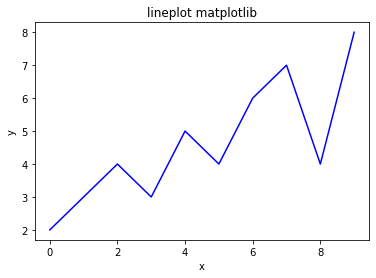

In [4]:
plt.plot(x, y, color = 'blue') # 그래프의 색 지정
plt.title("lineplot matplotlib") # 제목 설정
plt.xlabel("x") # x축 이름 설정
plt.ylabel("y") # y축 이름 설정

### 3.3.4 seaborn과 pyplot을 이용한 꺾은선 그래프

In [5]:
#seavorn을 불러주면 그래프의 디자인이 바뀐다.
import seaborn as sns
sns.set()

Text(0, 0.5, 'score')

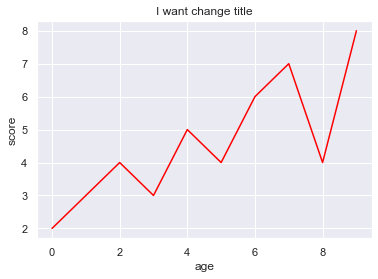

In [6]:
plt.plot(x, y, color = 'red')
plt.title("I want change title") #제목을 바꿔보고 싶었다.
plt.xlabel("age")#x축도 바꿔보고
plt.ylabel("score") #y축도 바꿔보자.

### 3.2.5 seaborn을 이용한 히스토그램

In [7]:
# 데이터 불러오기(일변량 데이터)
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

<AxesSubplot:ylabel='Count'>

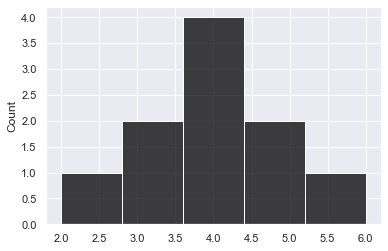

In [13]:
sns.histplot(fish_data, bins =5, color = 'black', kde = False)

교재에서는 sns.distplot 쓰라고하는데 이거 곧 없어지니까 sns.displot이나 sns.histplot을 쓰란다. 그렇다고 한다.
  bins 가 구간을 지정해 주는 것이다. kde = False는 커널 밀도 추정을 하지 않겠다고 지정하는 파라미터이다.
  
  커널 밀도 추정이 뭘까?

### 3.3.6 커널밀도추정에 따른 히스토그램 평활화

  커널밀도추정: 히스토그램이 가진 문제를 해소하기 위한 방법
  - 히스토그램의 문제: 구간 설정에 따라 모양이 크게 변한다.

<AxesSubplot:ylabel='Count'>

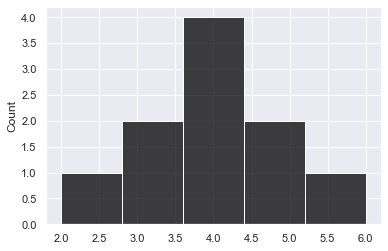

In [15]:
# 커널밀도추정 활성화
sns.histplot(fish_data, color = 'black')

### 3.3.7 2변량 데이터에 대한 히스토그램

In [24]:
#2변량 데이터 불러오자아아아
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [26]:
# 종류별 통계량 보여주기
print(fish_multi.groupby("species").describe())

#3.2.5 참고하세요오오오오

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


In [28]:
# 몸길이 데이터 추출해서 변수로 저장을 한다.
length_a = fish_multi.query('species == "A"')["length"]
length_b = fish_multi.query('species == "B"')["length"]

데이터.query 함수에 대해서 불러온 2변량 데이터의 A일때의 length, B일때의 length를 불러오는거라서 나는 조건부 확률로 이해를 했는데 이게 맞는걸까?

<AxesSubplot:xlabel='length', ylabel='Count'>

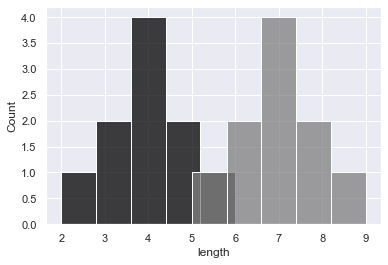

In [30]:
# 히스토그램을 그리는 함수를 2번 연속 실행하면 겹쳐진 히스토그램을 그릴 수 있다
sns.histplot(length_a, bins = 5, 
             color = 'black', kde = False)
sns.histplot(length_b, bins = 5, 
             color = 'gray', kde = False)

<AxesSubplot:xlabel='length', ylabel='Count'>

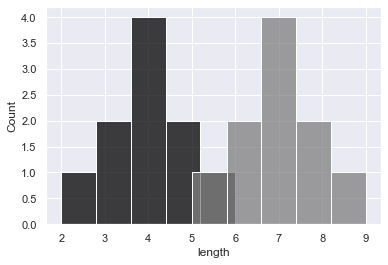

In [32]:
# 커널밀도함수 추정을 활성화 해보았다.
sns.histplot(length_a, color = 'black')
sns.histplot(length_b, color = 'gray')

#효과는 미비했다. 그래도 좀 식이 짧아졌으니 만족하자.
#이렇게 하면 데이터 양이 비슷하지 않을때 구간수가 다르게 나올걸 대비해서
#커널밀도함수 추정을 비활성화하고 구간 개수를 지정해주는거려나?

### 3.3.8 다변량 데이터를 시각화하는 코드 작성

  히스토그램은 1종류의 데이터에 대해서 적용하는게 좋다.
  위 방법처럼 매번 query 함수를 통해서 1변량 함수 여러개로 만들면 손도 아프고 정신 나간다.
  다변량 데이터를 위해 만들어진 그래프를 이용할 것이다. 상자수염 그림, 바이올린플롯도 그 중 하나이다.
  
  seaborn 라이브러리를 사용할 경우,  
  sns.함수명(  
        x = "x축의 열 이름",  
        y = "y축의 열 이름",  
        data = 데이터프레임,  
        그_외의_인수  
  )  
  위와 같은 꼴로 작성을 한다는걸 알고 넘어가자

### 3.3.9 상자수염그림

  상자수염그림은  
  카테고리 변수 X 수치형 변수  
  조합의 데이터를 표시해여할 경우 많이 사용한다.  

<AxesSubplot:xlabel='species', ylabel='length'>

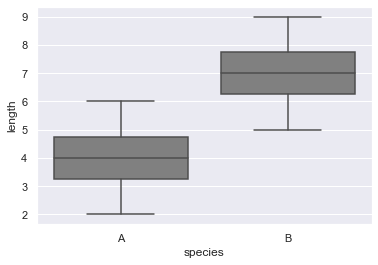

In [34]:
# 상자그림
sns.boxplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

In [35]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

각각의 요소들이 상자수염 그림에서 어디에 해당하는지 표를 보면 좀 더 쉽게 알 수 있다.

### 3.3.10 바이올린플롯

상자수염스림 대신 커널밀도 추정의 결과를 사용한 것이다.  
비교적 최근에 등장했다.   
가독성 좋다.

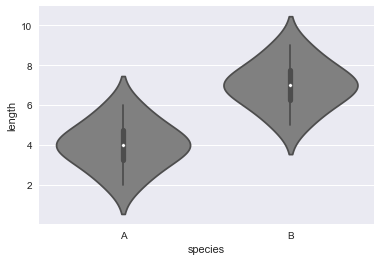

In [16]:
sns.violinplot(x = "species", y  = "length", 
               data = fish_multi, color = 'gray')

In [36]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

사실 어떤면에서 가독성이 좋다는건지 모르겠다. 나는 상자수염그림이 편하다.

### 3.3.11 막대그래프

<AxesSubplot:xlabel='species', ylabel='length'>

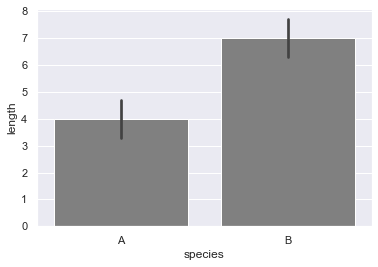

In [37]:
sns.barplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

각 막대의 높이 : 평균값  
검은선 (`에러바`) : 신뢰구간    
상자그림에 비해 정보가 적어 논문이나 리포트엔 상자그림이나 바이올린 플롯을 사용한다.

### 3.3.12 산포도

In [43]:
# 데이터 불러오기_3.2의 상관계수 계산할때 사용했던 데이터
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


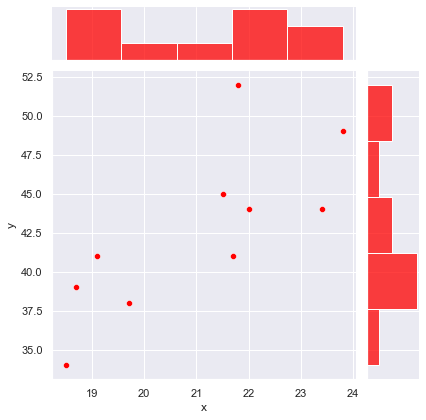

In [46]:
sns.jointplot(x = "x", y = "y", data = cov_data, color = 'red')

이제 만들어낸 이런 그래프를 이용해서 3.2.14 에서처럼 상관계수가 낮게 나오면 유의미한지 무의미한지 그래프를 그려보면 된다.

### 3.3.13 페어플롯

많은 양의 뱐수를 가지고 있는 데이터를 그리는 방법이다.  
2개 이상의 변수를 모아서 정리하여 표시하려면 코드가 이전까지와는 조금 달라진다.

In [47]:
# seaborn에 내장된 붓꽃 데이터 불러오기
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


5종의 카테고리형 변수와 수치형 변수가 뒤 섞여 있음을 볼 수 있다.

In [48]:
# species를 기준으로 평균 값을 정리해보자.
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


위에 표엔 없던 versicolor랑 virginica는 도대체 어디서 나온 친구들인지 좀 궁금하다.

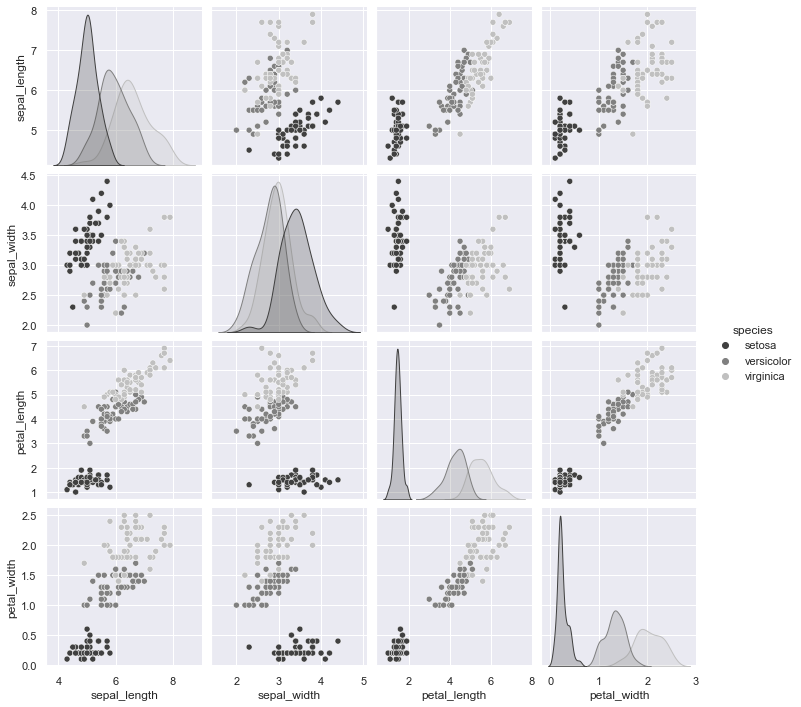

In [49]:
# 이제 그래프를 그려보자
sns.pairplot(iris, hue="species", palette='yellow')

pairplot함수는 데이터 프레임만 넘기면 산포도를 그리지만, hue = "카테고리 변수의 열 이름"을 넘기면 카테고리 별로 색을 나누어 그래프를 그려준다.